In [2]:
import numpy as np
import pandas as pd

# Set the seed for reproducibility
np.random.seed(0)

# Generate random data
appliances = np.random.randint(1, 21, 50000)
consumption = 50 + 20 * appliances + np.random.normal(0, 10, 50000)

# Create a DataFrame
data = pd.DataFrame({
    'Appliances': appliances,
    'Consumption': consumption
})

# Display the dataset
data

,Appliances,Consumption
0,13,306.665606
1,16,370.992819
2,1,57.640525
3,4,130.965767
4,4,133.895430
...,...,...
49995,7,184.549355
49996,5,149.672556
49997,4,122.530414
49998,3,126.955432


In [3]:
print(data.isnull().sum())

Appliances     0
Consumption    0
dtype: int64


In [7]:
from sklearn.model_selection import train_test_split

# Split the data
X = data[['Appliances']]
y = data['Consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
data.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 2), (40000, 1), (10000, 1), (40000,), (10000,))

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [10]:
# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Predict on the train set
y_train_pred = model.predict(X_train)

# Evaluate the model on train data
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f'Train Mean Squared Error: {train_mse:.2f}')
print(f'Train R-squared: {train_r2:.2f}')

Train Mean Squared Error: 98.89
Train R-squared: 0.99


In [14]:
# Predict on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model on test data
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Test Mean Squared Error: {test_mse:.2f}')
print(f'Test R-squared: {test_r2:.2f}')

Test Mean Squared Error: 100.23
Test R-squared: 0.99


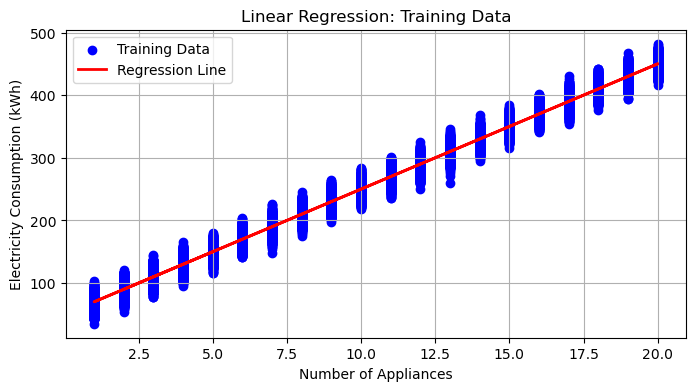

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
# Plot the training data
plt.scatter(X_train, y_train, color='blue', label='Training Data')

# Plot the regression line
plt.plot(X_train, y_train_pred, color='red', linewidth=2, label='Regression Line')

# Adding titles and labels
plt.title('Linear Regression: Training Data')
plt.xlabel('Number of Appliances')
plt.ylabel('Electricity Consumption (kWh)')

# Adding a legend
plt.legend()
plt.grid()
# Show the plot
plt.show()

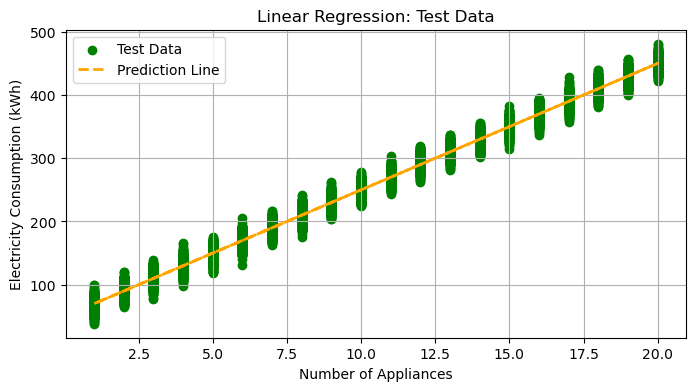

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
# Plot the test data
plt.scatter(X_test, y_test, color='green', label='Test Data')

# Plot the regression line for test data
plt.plot(X_test, y_test_pred, color='orange', linestyle='--', linewidth=2, label='Prediction Line')

# Adding titles and labels
plt.title('Linear Regression: Test Data')
plt.xlabel('Number of Appliances')
plt.ylabel('Electricity Consumption (kWh)')

# Adding a legend
plt.legend()
plt.grid()
# Show the plot
plt.show()

In [21]:
# Make predictions
new_data = np.array([[12], [18]])
predictions = model.predict(new_data)

for i, pred in enumerate(predictions):
    print(f'Predicted consumption for {new_data[i][0]} appliances: {pred:.2f} kWh')

Predicted consumption for 12 appliances: 289.99 kWh
Predicted consumption for 18 appliances: 410.01 kWh


c:\Users\Balu\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
# Save the model to a file
joblib.dump(model, 'linear_regression_model.pkl')

['linear_regression_model.pkl']